In this notebook, we export create then the microstructure associated with t5_dct_cen_ scan as an HDF5 file.

In [1]:
from pymicro.crystal.microstructure import Microstructure

m = Microstructure.from_h5('t5_dct_cen_.h5')
print(m.get_lattice())
print(m.data_dir)
print(m.get_number_of_grains())
print(m.get_grain(1))
print(m.grain_map.shape)
print(m.mask.shape)

some grains
(146, 3)
Lattice
 abc : 0.3 0.3 0.5
 angles : 90.0 90.0 120.0
 volume : 0.0347
 A : 0.3 0.0 0.0
 B : -0.1 0.3 0.0
 C : 0.0 0.0 0.5
id11/t5_/t5_dct_cen_
146
Grain
 * id = 1
 * Crystal Orientation
orientation matrix = [[ 0.60924219 -0.23562441 -0.75716913]
 [ 0.37332066  0.92762839  0.01171575]
 [ 0.69961106 -0.28980461  0.65311381]]
Euler angles (degrees) = (  67.499,  49.223, 270.886)
Rodrigues vector = [ 0.09452095  0.45667314 -0.1908928 ]
Quaternion = [ 0.89302637 -0.0844097   0.40782116  0.17047231]
 * center [ 0.06439824 -0.14325327 -0.12103377]
 * has vtk mesh ? False

(654, 654, 420)
(654, 654, 420)


In [3]:
m.compute_grain_center(47)

ValueError: warning grain 47 not found in grain map

In [13]:
from scipy import ndimage
len(ndimage.find_objects(m.grain_map))

146

In [7]:
import numpy as np
np.unique(m.grain_map)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       144, 145, 146], dtype=int16)

In [2]:
m.compute_grain_center(1)

array([ 0.06770541, -0.14066359, -0.12443915])

In [4]:
import time

t0 = time.time()
m.recompute_grain_centers(verbose=True)
print('elapsed time = {:.2f} s'.format(time.time() - t0))

grain 1 center: 0.068, -0.141, -0.124
grain 2 center: -0.020, 0.144, -0.005
grain 3 center: -0.081, 0.184, -0.198
grain 4 center: -0.054, -0.098, 0.082
grain 5 center: -0.136, -0.087, -0.106
grain 6 center: 0.147, 0.074, -0.171
grain 7 center: -0.252, 0.027, -0.056
grain 8 center: 0.285, 0.104, 0.056
grain 9 center: 0.239, -0.220, -0.217
grain 10 center: 0.273, -0.027, -0.117
grain 11 center: 0.116, 0.216, 0.130
grain 12 center: 0.145, -0.092, 0.183
grain 13 center: -0.207, 0.203, 0.068
grain 14 center: -0.181, 0.024, -0.217
grain 15 center: 0.050, -0.232, 0.124
grain 16 center: -0.241, 0.244, -0.099
grain 17 center: -0.225, -0.228, -0.124
grain 18 center: -0.264, -0.098, -0.217
grain 19 center: 0.175, -0.035, 0.021
grain 20 center: 0.183, 0.121, -0.027
grain 21 center: 0.191, -0.183, 0.060
grain 22 center: 0.100, 0.245, -0.188
grain 23 center: -0.019, -0.258, -0.039
grain 24 center: -0.233, 0.009, 0.090
grain 25 center: 0.008, -0.014, -0.245
grain 26 center: 0.283, -0.214, -0.008
grai

In [11]:
# find center of mass of grain 1 (here the whole array is binarized)
from scipy import ndimage
import numpy as np
import time

t0 = time.time()
g = m.get_grain(1)
array_bin = (m.grain_map == g.id).astype(np.uint8)
print(array_bin.shape)
local_com = ndimage.measurements.center_of_mass(array_bin)  #TODO use labels to compute all the COM at once
com = local_com - 0.5 * np.array(m.grain_map.shape)
print('grain %2d center: %6.3f, %6.3f, %6.3f' % (g.id, com[0], com[1], com[2]))
print('elapsed time = {:.2f} s'.format(time.time() - t0))

(654, 654, 420)
grain  1 center: 48.361, -100.474, -88.885
elapsed time = 3.48 s


In [32]:
local_coms = ndimage.measurements.center_of_mass(m.grain_map, m.grain_map, [1, 2, 3])
print(local_coms)

[(375.3610074287355, 226.52600590490175, 121.11489430769971), (312.4066557223289, 430.05974306600376, 206.60559944312328), (269.2683249154354, 458.40789120088476, 68.72004599785072)]


In [30]:
from matplotlib import pyplot as plt, cm
%matplotlib inline

# find center of mass of grain 1 (here the VOI around the grain is extracted)
t0 = time.time()
for i in range(1, 11):
    g = m.get_grain(i)
    sl = ndimage.find_objects(m.grain_map == g.id)[0]
    offset = np.array([sl[0].start, sl[1].start, sl[2].start])
    #print('offset is {}'.format(offset))
    grain_data_bin = (m.grain_map[sl] == g.id).astype(np.uint8)
    local_com = ndimage.measurements.center_of_mass(grain_data_bin)
    com = offset + local_com - 0.5 * np.array(m.grain_map.shape)
    print('grain %2d center: %6.3f, %6.3f, %6.3f' % (g.id, com[0], com[1], com[2]))
print('elapsed time = {:.2f} s'.format(time.time() - t0))

grain  1 center: 48.361, -100.474, -88.885
grain  2 center: -14.593, 103.060, -3.394
grain  3 center: -57.732, 131.408, -141.280
grain  4 center: -38.552, -70.087, 58.412
grain  5 center: -97.413, -61.788, -75.410
grain  6 center: 104.771, 53.165, -122.219
grain  7 center: -179.917, 19.396, -39.662
grain  8 center: 203.912, 73.982, 39.936
grain  9 center: 170.763, -157.351, -154.657
grain 10 center: 194.929, -19.498, -83.651
elapsed time = 7.02 s


In [24]:
s = ndimage.find_objects(m.grain_map == g.id)[0]
s

(slice(252, 499, None), slice(129, 341, None), slice(11, 242, None))

In [25]:
s[1].start

129

In [10]:
help(ndimage.measurements.center_of_mass)

Help on function center_of_mass in module scipy.ndimage.measurements:

center_of_mass(input, labels=None, index=None)
    Calculate the center of mass of the values of an array at labels.
    
    Parameters
    ----------
    input : ndarray
        Data from which to calculate center-of-mass. The masses can either
        be positive or negative.
    labels : ndarray, optional
        Labels for objects in `input`, as generated by `ndimage.label`.
        Only used with `index`.  Dimensions must be the same as `input`.
    index : int or sequence of ints, optional
        Labels for which to calculate centers-of-mass. If not specified,
        all labels greater than zero are used.  Only used with `labels`.
    
    Returns
    -------
    center_of_mass : tuple, or list of tuples
        Coordinates of centers-of-mass.
    
    Examples
    --------
    >>> a = np.array(([0,0,0,0],
    ...               [0,1,1,0],
    ...               [0,1,1,0],
    ...               [0,1,1,0]))
  

In [5]:
help(ndimage.find_objects)

Help on function find_objects in module scipy.ndimage.measurements:

find_objects(input, max_label=0)
    Find objects in a labeled array.
    
    Parameters
    ----------
    input : ndarray of ints
        Array containing objects defined by different labels. Labels with
        value 0 are ignored.
    max_label : int, optional
        Maximum label to be searched for in `input`. If max_label is not
        given, the positions of all objects are returned.
    
    Returns
    -------
    object_slices : list of tuples
        A list of tuples, with each tuple containing N slices (with N the
        dimension of the input array).  Slices correspond to the minimal
        parallelepiped that contains the object. If a number is missing,
        None is returned instead of a slice.
    
    See Also
    --------
    label, center_of_mass
    
    Notes
    -----
    This function is very useful for isolating a volume of interest inside
    a 3-D array, that cannot be "seen through".


In [19]:
m.dilate_grains(dilation_steps=10)

3569287 voxels to replace
dilation step 1 done
2119352 voxels to replace
dilation step 2 done
1350588 voxels to replace
dilation step 3 done
983544 voxels to replace
dilation step 4 done
806833 voxels to replace
dilation step 5 done
707934 voxels to replace
dilation step 6 done
636081 voxels to replace
dilation step 7 done
573665 voxels to replace
dilation step 8 done
515377 voxels to replace
dilation step 9 done
453114 voxels to replace
dilation step 10 done


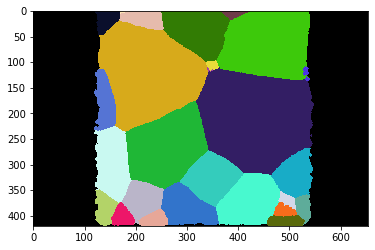

In [17]:
import numpy as np
from matplotlib import pyplot as plt, cm
%matplotlib inline

rand_cmap = Microstructure.rand_cmap(first_is_black=True)
#plt.imshow(m.grain_map[:, :, 210].T, cmap=rand_cmap)
#plt.imshow(m.grain_map[:, 327, :].T, cmap=rand_cmap)
plt.imshow(m.grain_map[327, :, :].T, cmap=rand_cmap)


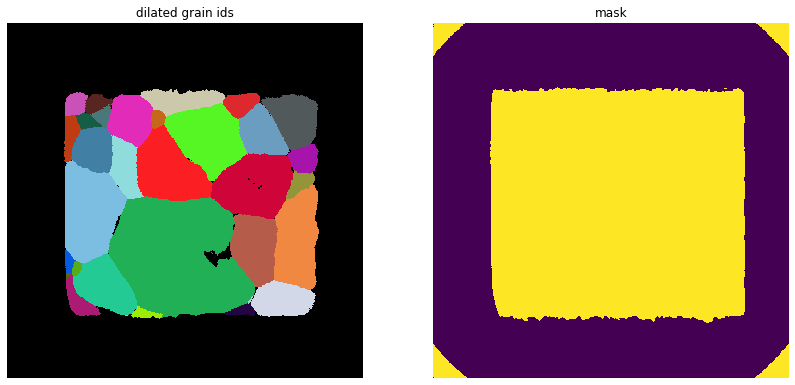

In [79]:
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow((grain_map[:, :, 210] * m.mask[:, :, 210]).T, cmap=rand_cmap)
plt.axis('off')
plt.title('dilated grain ids')
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(m.mask[:, :, 210].T)
plt.axis('off')
plt.title('mask')
plt.show()

Second example
--
Here we try the dilation function on the merged volume between `t5_dct_bot_` and `t5_dct_cen_`

In [26]:
from pymicro.crystal.microstructure import Microstructure

micro_botcen = Microstructure.from_h5('t5_dct_bot_-t5_dct_cen_.h5')
print(micro_botcen.grain_map.shape)

some grains
(262, 3)
(676, 676, 788)


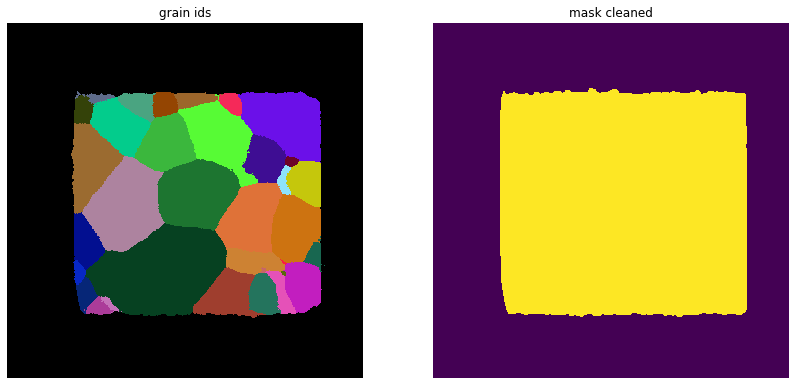

In [31]:
from scipy import ndimage

# fix the mask: keep largest connected component and perform morphological opening
label_mask, nb_labels = ndimage.label(micro_botcen.mask)
sizes = ndimage.sum(micro_botcen.mask, label_mask, range(nb_labels + 1))
mask = sizes == max(sizes)
mask_cleaned = mask[label_mask]
mask_cleaned = ndimage.binary_opening(mask_cleaned, structure=np.ones((3, 3, 3)), iterations=2)
micro_botcen.mask = mask_cleaned.astype(np.uint8)

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(micro_botcen.grain_map[:, :, 400].T, cmap=rand_cmap)
plt.axis('off')
plt.title('grain ids')
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(mask_cleaned[:, :, 400].T)
plt.axis('off')
plt.title('mask cleaned')
plt.show()

In [32]:
micro_botcen.dilate_grains(dilation_steps=20)

743164 voxels to replace
dilation step 1 done
610117 voxels to replace
dilation step 2 done
510682 voxels to replace
dilation step 3 done
444881 voxels to replace
dilation step 4 done
397029 voxels to replace
dilation step 5 done
360883 voxels to replace
dilation step 6 done
334520 voxels to replace
dilation step 7 done
315696 voxels to replace
dilation step 8 done
302596 voxels to replace
dilation step 9 done
293284 voxels to replace
dilation step 10 done
286246 voxels to replace
dilation step 11 done
280952 voxels to replace
dilation step 12 done
277059 voxels to replace
dilation step 13 done
274248 voxels to replace
dilation step 14 done
272123 voxels to replace
dilation step 15 done
270355 voxels to replace
dilation step 16 done
268975 voxels to replace
dilation step 17 done
267863 voxels to replace
dilation step 18 done
267005 voxels to replace
dilation step 19 done
266315 voxels to replace
dilation step 20 done


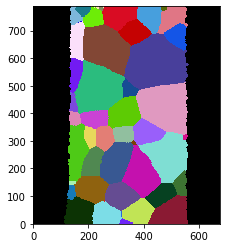

In [35]:
plt.imshow(micro_botcen.grain_map[327, :, :].T, cmap=rand_cmap, origin='lower')

In [38]:
micro_botcen.to_h5()

opening file t5_dct_bot_-t5_dct_cen_.h5 for writing
done writing


In [37]:
micro_botcen.mask = micro_botcen.mask.astype(np.uint8)